# Grouping NBA Players with similar skills
- This notebook includes:
    - Feature Scaling
    - Princpal Component Analysis (PCA)
    - Elbow Method
    - Silhoette Coefficient
    - K-Means Clustering
    - Anomaly Detection
        - Multivariate Gaussian Distribution

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('nba.csv')

In [3]:
df.head()

,NAME,Pos,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,FT%,FTA,ORB,PF,PTS,STL,TOV,TRB,PPG,SALARY
0,Jaylen Adams,PG,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,...,0.778,9.0,11.0,45.0,108.0,14.0,28.0,60.0,3.2,270014
1,Steven Adams,C,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,...,0.500,292.0,391.0,204.0,1108.0,117.0,135.0,760.0,13.8,24157303
2,Bam Adebayo,C,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,...,0.735,226.0,165.0,203.0,729.0,71.0,121.0,597.0,8.9,2955840
3,LaMarcus Aldridge,C,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,...,0.847,412.0,251.0,179.0,1727.0,43.0,144.0,744.0,21.3,22347015
4,Grayson Allen,SG,416,7.5,0.516,0.556,0.337,0.8,5.1,3.0,...,0.750,60.0,3.0,47.0,211.0,6.0,33.0,23.0,5.6,2074320


In [4]:
df.columns

Index(['NAME', 'Pos', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', '2P', '2P%', '2PA', '3P', '3P%',
       '3PA', 'AST', 'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA',
       'ORB', 'PF', 'PTS', 'STL', 'TOV', 'TRB', 'PPG', 'SALARY'],
      dtype='object')

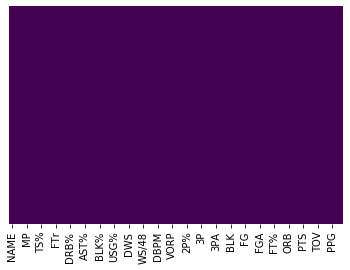

In [5]:
# Checking for null values
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap = 'viridis')

In [6]:
df.describe()

,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,...,FT%,FTA,ORB,PF,PTS,STL,TOV,TRB,PPG,SALARY
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,1149.055446,13.032277,0.537337,0.396406,0.244380,4.318020,14.936832,9.628713,13.542178,1.489703,...,0.751012,106.178218,44.449505,97.162376,522.724752,36.590099,63.134653,203.372277,9.400396,7.029093e+06
std,779.342690,5.000402,0.063476,0.191499,0.118316,3.473867,6.657502,4.652972,8.102424,0.657717,...,0.115366,118.518902,51.981013,63.949178,466.965905,30.899804,58.717153,179.501868,5.699165,7.881053e+06
min,20.000000,-6.600000,0.240000,0.002000,0.019000,0.000000,3.800000,2.600000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,2.000000,0.900000,4.737000e+03
25%,453.000000,10.100000,0.509000,0.279000,0.162000,1.900000,10.200000,6.200000,7.700000,1.000000,...,0.695000,28.000000,12.000000,45.000000,164.000000,12.000000,20.000000,66.000000,5.600000,1.512601e+06
50%,1059.000000,12.400000,0.544000,0.400000,0.225000,3.000000,13.200000,8.400000,11.100000,1.400000,...,0.767000,65.000000,28.000000,91.000000,405.000000,28.000000,47.000000,160.000000,7.900000,3.364249e+06
75%,1766.000000,15.900000,0.576000,0.539000,0.297000,5.700000,18.400000,12.100000,17.600000,1.800000,...,0.828000,137.000000,57.000000,141.000000,737.000000,54.000000,86.000000,269.000000,12.000000,1.059551e+07
max,3028.000000,32.900000,0.736000,0.914000,0.879000,18.300000,60.300000,38.400000,47.500000,4.500000,...,1.000000,858.000000,423.000000,292.000000,2818.000000,170.000000,387.000000,1232.000000,36.100000,3.745715e+07


In [7]:
# Creating a list of names for later use
names = df['NAME'].tolist()

df.head()

,NAME,Pos,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,FT%,FTA,ORB,PF,PTS,STL,TOV,TRB,PPG,SALARY
0,Jaylen Adams,PG,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,...,0.778,9.0,11.0,45.0,108.0,14.0,28.0,60.0,3.2,270014
1,Steven Adams,C,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,...,0.500,292.0,391.0,204.0,1108.0,117.0,135.0,760.0,13.8,24157303
2,Bam Adebayo,C,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,...,0.735,226.0,165.0,203.0,729.0,71.0,121.0,597.0,8.9,2955840
3,LaMarcus Aldridge,C,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,...,0.847,412.0,251.0,179.0,1727.0,43.0,144.0,744.0,21.3,22347015
4,Grayson Allen,SG,416,7.5,0.516,0.556,0.337,0.8,5.1,3.0,...,0.750,60.0,3.0,47.0,211.0,6.0,33.0,23.0,5.6,2074320


In [8]:
df_sorted = df.sort_values(by='PPG',ascending=False)

In [9]:
# Top 100 players according to average PPG
df_sorted = df_sorted.head(100)
names = df_sorted['NAME'].tolist()

# Feature Scaling

- From the dataset, we can see that there are some of the values that are way larger than others. (E.g. Salary Vs. TS%)
- Feature scaling is extremely important for PCA and K-Means clustering
- The K-Means clustering uses Euclidean distance, and thus standardizing or normalizing the features here matters
- In PCA, PCA tries to get the features with maximum variance and the variance is high for high magnitude features and skews the PCA towards high magnitude features
- We chose to work with Mean Normalization (MinMaxScaler)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = df_sorted.drop(['Pos','NAME'],axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

# Principal Component Analysis (PCA)
- reduce 45 columns into 2 columns
- Using PCA we reduced the dataset to 2 columns (PC1 and PC2) to be able to visually plot the clusters in a 2D plot

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_cluster = pd.DataFrame(pca.fit_transform(X_scaled))

In [12]:
df_cluster.columns = ('PC1','PC2')

In [13]:
df_cluster

,PC1,PC2
0,2.571391,-1.104343
1,1.510321,-0.689242
2,2.345848,0.938218
3,1.407260,0.748901
4,0.960589,-0.035600
...,...,...
95,-1.012288,0.489692
96,-0.133716,0.321579
97,-0.175607,0.246379
98,0.208291,0.555396


# Elbow Criterion 
- Using the 'elbow' method we can see how many K clusters would work best with this dataset

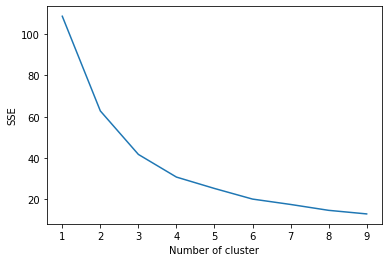

In [14]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- From this plot we can see that there are 2 distinct 'elbows' and Cluster 2 and 3.
- To determine which cluster is better, we can use the Silhouette Coefficient method to see which has a higher score

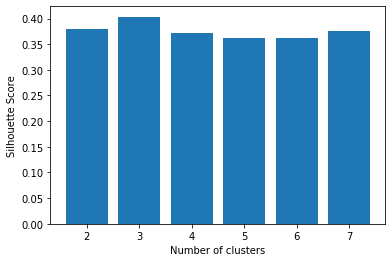

In [15]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(df_cluster, KMeans(n_clusters = n_cluster).fit_predict(df_cluster))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

- Using Silhouette Scoring, we will use 3 clusters

# K-means Clustering
- There will be 3 clusters according to the Silhouette scoring

In [16]:
# Specify number of clusters
kmeans = KMeans(n_clusters = 3)

# Fit the data
kmeans.fit(df_cluster)

# Get the cluster labels
labels = kmeans.predict(df_cluster)

# Centroid values
centroid = kmeans.cluster_centers_

# Cluster values
clusters = kmeans.labels_.tolist()

In [17]:
df_cluster['cluster'] = clusters
df_cluster['NAME'] = names
df_cluster

,PC1,PC2,cluster,NAME
0,2.571391,-1.104343,0,James Harden
1,1.510321,-0.689242,0,Paul George
2,2.345848,0.938218,2,Giannis Antetokounmpo
3,1.407260,0.748901,2,Joel Embiid
4,0.960589,-0.035600,0,LeBron James
...,...,...,...,...
95,-1.012288,0.489692,1,Marc Gasol
96,-0.133716,0.321579,1,Jerami Grant
97,-0.175607,0.246379,1,Marc Gasol
98,0.208291,0.555396,2,Al Horford


In [18]:
# centroid DF
centroid_df = pd.DataFrame(centroid, columns = ('PC1','PC2'))
centroid_df

,PC1,PC2
0,0.596005,-0.480034
1,-0.666173,0.003486
2,0.802380,0.921576


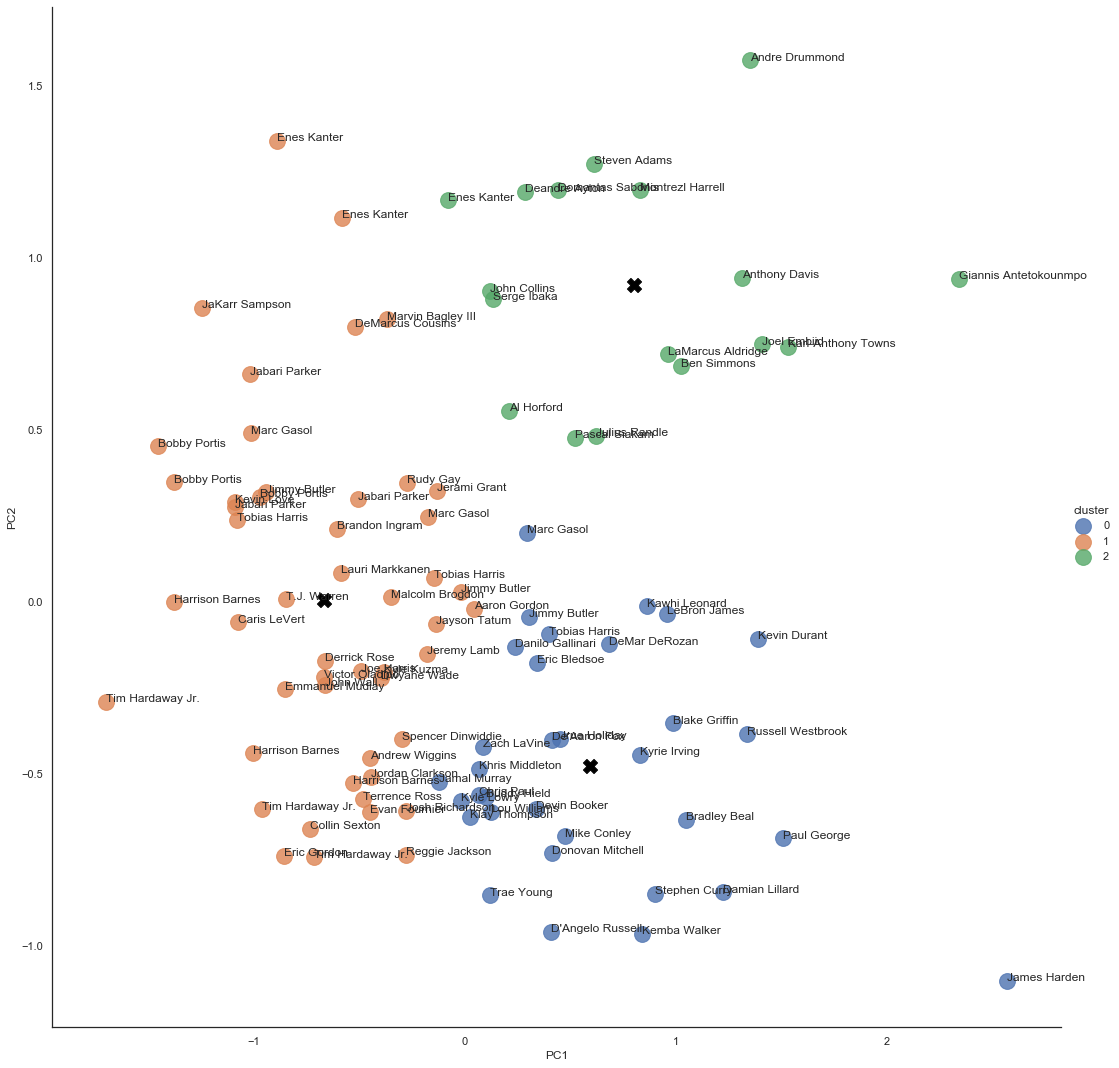

In [19]:
sns.set(style="white")

sns.lmplot(x="PC1", y="PC2", hue='cluster', data = df_cluster, legend=True,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

plt.scatter(x='PC1',y='PC2',data=centroid_df, s=200, alpha =1, c='black', marker='X')

text = []
for x, y, z in zip (df_cluster.PC1, df_cluster.PC2, df_cluster.NAME):
    text.append(plt.text(x,y,z))

In [20]:
# Creating a DF with position and Name to ensure the clustering algorithm was correct
dff = df[['NAME','Pos']]
df_cluster2 = df_cluster.merge(dff,on='NAME',how='inner')

In [21]:
# Determining if clusters was correct
cluster_0 = df_cluster2[df_cluster2['cluster']==0]
cluster_1 = df_cluster2[df_cluster2['cluster']==1]
cluster_2 = df_cluster2[df_cluster2['cluster']==2]

In [22]:
print('Cluster 0:\n',cluster_0['Pos'].value_counts())
print('\n')
print('Cluster 1:\n',cluster_1['Pos'].value_counts())
print('\n')
print('Cluster 2:\n',cluster_2['Pos'].value_counts())

Cluster 0:
 PG       14
SG       10
SF        7
PF        4
C         3
SF-SG     1
Name: Pos, dtype: int64


Cluster 1:
 PF       34
SG       21
C        13
SF       11
PG        6
PF-SF     3
SF-SG     2
Name: Pos, dtype: int64


Cluster 2:
 C     14
PF     4
PG     1
Name: Pos, dtype: int64


- Cluster 0 represents players who are generally more 'bigger' in the league and can grab rebounds
- We can see here, that cluster 1 favours more of the Fowards positions (C and PF)
- While cluster 2 favours the Guards positions (PG and SG)

# Attemping to cluster players by position (5 Clusters)

In [23]:
# Specify number of clusters
kmeans = KMeans(n_clusters = 5)

# Fit the data
kmeans.fit(df_cluster.drop(['NAME','cluster'],axis=1))

# Get the cluster labels
labels = kmeans.predict(df_cluster.drop(['NAME','cluster'],axis=1))

# Centroid values
centroid = kmeans.cluster_centers_

# Cluster values
clusters = kmeans.labels_.tolist()

df_cluster['cluster'] = clusters
df_cluster['NAME'] = names

centroid_df = pd.DataFrame(centroid, columns = ('PC1','PC2'))

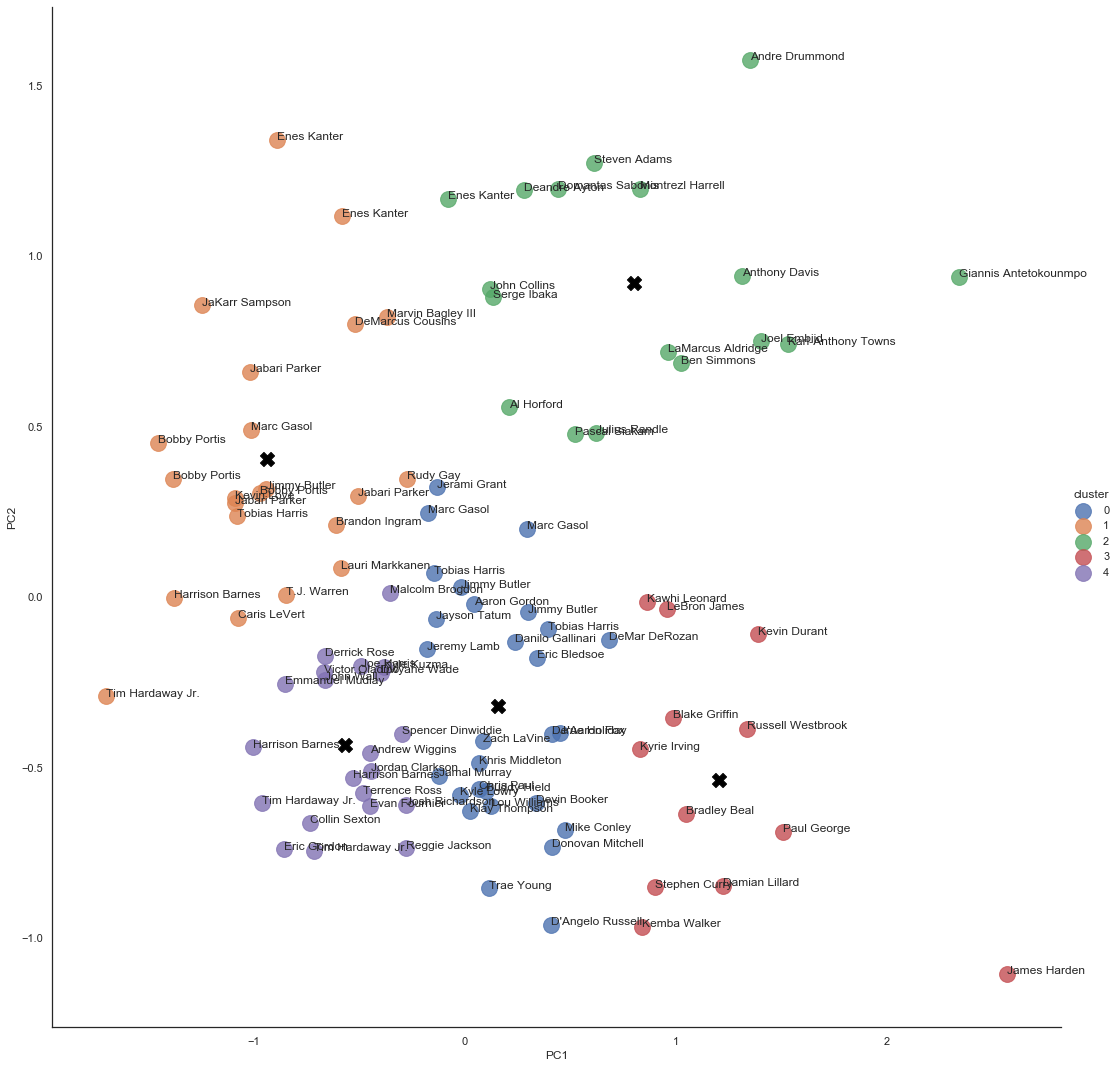

In [24]:
sns.set(style="white")

sns.lmplot(x="PC1", y="PC2", hue='cluster', data = df_cluster, legend=True,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

plt.scatter(x='PC1',y='PC2',data=centroid_df, s=200, alpha =1, c='black', marker='X')

text = []
for x, y, z in zip (df_cluster.PC1, df_cluster.PC2, df_cluster.NAME):
    text.append(plt.text(x,y,z))

In [25]:
# Creating a DF with position and Name to ensure the clustering algorithm was correct
dff = df[['NAME','Pos']]
df_cluster2 = df_cluster.merge(dff,on='NAME',how='inner')

In [26]:
# Determining if clusters was correct
cluster_0 = df_cluster2[df_cluster2['cluster']==0]
cluster_1 = df_cluster2[df_cluster2['cluster']==1]
cluster_2 = df_cluster2[df_cluster2['cluster']==2]
cluster_3 = df_cluster2[df_cluster2['cluster']==3]
cluster_4 = df_cluster2[df_cluster2['cluster']==4]

In [27]:
print('Cluster 0:\n',cluster_0['Pos'].value_counts())
print('\n')
print('Cluster 1:\n',cluster_1['Pos'].value_counts())
print('\n')
print('Cluster 2:\n',cluster_2['Pos'].value_counts())
print('\n')
print('Cluster 3:\n',cluster_3['Pos'].value_counts())
print('\n')
print('Cluster 4:\n',cluster_4['Pos'].value_counts())

Cluster 0:
 SG       11
PG        8
PF        8
C         6
SF        5
SF-SG     2
Name: Pos, dtype: int64


Cluster 1:
 PF       26
C        10
SF        6
SG        4
PF-SF     1
SF-SG     1
Name: Pos, dtype: int64


Cluster 2:
 C     14
PF     4
PG     1
Name: Pos, dtype: int64


Cluster 3:
 PG    6
SF    4
SG    1
PF    1
Name: Pos, dtype: int64


Cluster 4:
 SG       15
PG        6
SF        3
PF        3
PF-SF     2
Name: Pos, dtype: int64


- We can see using 5 clusters, we were able to cluster each player respective to their position
- Clusters 3 and 4 represent players who play the Forward position (PF and C)
- Clusters 0 and 1 represent players who play the Guard Position (PG and SG)
- While cluster 2 is an interesting cluster as it clusters players who tend to have a higher shooting rate.
    - It clusters PF's who have a higher shooting percentage, e.g. Lauri Markkanen and Marc Gasol.

# Anomaly Detection
- using Multivariate Gaussian Distribution

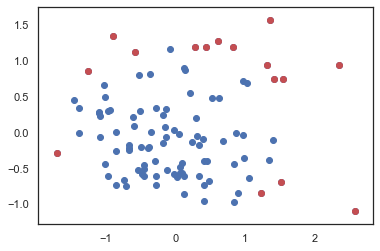

In [28]:
# Function for determining mu, sigma, and returning dataset of probabilities for a
# Multivariate Gaussian Distribution 
from scipy.stats import multivariate_normal
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis = 0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    dataset['Gaussian Distribution'] = p.pdf(dataset)
    return dataset

epsilon = 0.05

mu, sigma = estimateGaussian(df_cluster[['PC1','PC2']])

g = multivariateGaussian(df_cluster[['PC1','PC2']], mu, sigma)

less_than = pd.Series(g[g['Gaussian Distribution'] < epsilon]['PC1'])
less_than1 = pd.Series(g[g['Gaussian Distribution'] < epsilon]['PC2'])

plt.scatter(g['PC1'],g['PC2'],color = 'b')
plt.scatter(less_than, less_than1, color = 'r')
plt.show()

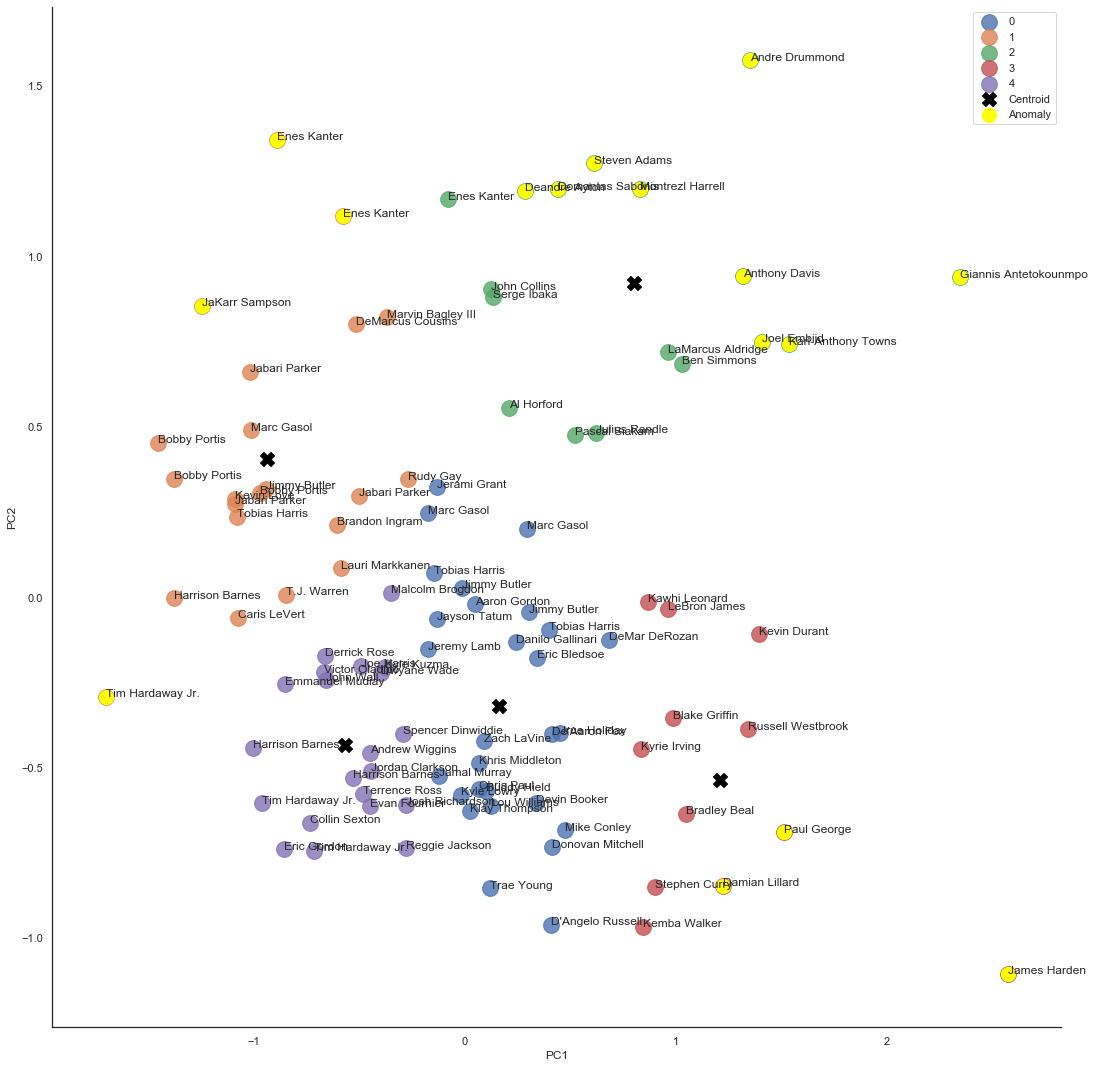

In [44]:
# Function for determining mu, sigma, and returning dataset of probabilities for a
# Multivariate Gaussian Distribution 
# Plotting anomalies
from scipy.stats import multivariate_normal
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis = 0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    dataset['Gaussian Distribution'] = p.pdf(dataset)
    return dataset

epsilon = 0.05

mu, sigma = estimateGaussian(df_cluster[['PC1','PC2']])
g = multivariateGaussian(df_cluster[['PC1','PC2']], mu, sigma)
anomaly_pc1 = pd.Series(g[g['Gaussian Distribution'] < epsilon]['PC1'])
anomaly_pc2 = pd.Series(g[g['Gaussian Distribution'] < epsilon]['PC2'])

sns.set(style="white")

sns.lmplot(x="PC1", y="PC2", hue='cluster', data = df_cluster, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

plt.scatter(x='PC1',y='PC2',data=centroid_df, s=200, alpha =1, c='black', marker='X', label = 'Centroid')

text = []
for x, y, z in zip (df_cluster.PC1, df_cluster.PC2, df_cluster.NAME):
    text.append(plt.text(x,y,z))
    
plt.scatter(anomaly_pc1, anomaly_pc2, color = 'yellow', s = 200, marker='o', label = 'Anomaly')
plt.legend()
plt.show()

- We can see here that some of the players above are listed as anomalies, but why are they anomalies? I intend to explore the dataset to determine why these are listed as anomalies by looking at their stats

In [30]:
# Creating a series of names of Anomalous players
anomalies = df_cluster[df_cluster['PC1'].eq(anomaly_pc1)]['NAME']
# Creating a new dataframe for anomalous players and their stats
anomalies_df = df[df['NAME'].str.strip().isin(anomalies)]

- What makes their stats so special (anomalous) to the normal?

In [31]:
df.describe()

,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,...,FT%,FTA,ORB,PF,PTS,STL,TOV,TRB,PPG,SALARY
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,1149.055446,13.032277,0.537337,0.396406,0.244380,4.318020,14.936832,9.628713,13.542178,1.489703,...,0.751012,106.178218,44.449505,97.162376,522.724752,36.590099,63.134653,203.372277,9.400396,7.029093e+06
std,779.342690,5.000402,0.063476,0.191499,0.118316,3.473867,6.657502,4.652972,8.102424,0.657717,...,0.115366,118.518902,51.981013,63.949178,466.965905,30.899804,58.717153,179.501868,5.699165,7.881053e+06
min,20.000000,-6.600000,0.240000,0.002000,0.019000,0.000000,3.800000,2.600000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,2.000000,0.900000,4.737000e+03
25%,453.000000,10.100000,0.509000,0.279000,0.162000,1.900000,10.200000,6.200000,7.700000,1.000000,...,0.695000,28.000000,12.000000,45.000000,164.000000,12.000000,20.000000,66.000000,5.600000,1.512601e+06
50%,1059.000000,12.400000,0.544000,0.400000,0.225000,3.000000,13.200000,8.400000,11.100000,1.400000,...,0.767000,65.000000,28.000000,91.000000,405.000000,28.000000,47.000000,160.000000,7.900000,3.364249e+06
75%,1766.000000,15.900000,0.576000,0.539000,0.297000,5.700000,18.400000,12.100000,17.600000,1.800000,...,0.828000,137.000000,57.000000,141.000000,737.000000,54.000000,86.000000,269.000000,12.000000,1.059551e+07
max,3028.000000,32.900000,0.736000,0.914000,0.879000,18.300000,60.300000,38.400000,47.500000,4.500000,...,1.000000,858.000000,423.000000,292.000000,2818.000000,170.000000,387.000000,1232.000000,36.100000,3.745715e+07


In [37]:
# Exploring the data and player's stats to determine why they are anomalous
col = ['MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', '2P', '2P%', '2PA', '3P', '3P%',
       '3PA', 'AST', 'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA',
       'ORB', 'PF', 'PTS', 'STL', 'TOV', 'TRB', 'PPG', 'SALARY']
rows_upper = []
rows_lower = []
for i in col:
    mean = np.mean(df[i])
    std_dev = np.std(df[i])
    upper_bound = mean + (2*std_dev)
    lower_bound = mean - (2*std_dev)
    
    rows_upper.append(anomalies_df[anomalies_df[i].gt(upper_bound)][i])
    rows_lower.append(anomalies_df[anomalies_df[i].lt(lower_bound)][i])
    

anomaly_upper = pd.DataFrame(rows_upper).transpose()
anomaly_upper = anomaly_upper.join(anomalies_df['NAME'])

anomaly_lower = pd.DataFrame(rows_lower).transpose()
anomaly_lower = anomaly_lower.join(anomalies_df['NAME'])

In [38]:
anomaly_upper = anomaly_upper[['NAME','MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', '2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST',
       'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'ORB', 'PF',
       'PTS', 'STL', 'TOV', 'TRB', 'PPG', 'SALARY']]

anomaly_lower = anomaly_lower[['NAME','MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', '2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST',
       'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'ORB', 'PF',
       'PTS', 'STL', 'TOV', 'TRB', 'PPG', 'SALARY']]

In [39]:
anomaly_upper

,NAME,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,FT%,FTA,ORB,PF,PTS,STL,TOV,TRB,PPG,SALARY
1,Steven Adams,NaN,NaN,NaN,NaN,NaN,14.7,NaN,NaN,NaN,...,NaN,NaN,391.0,NaN,NaN,117.0,NaN,760.0,NaN,24157303.0
12,Giannis Antetokounmpo,NaN,30.9,NaN,NaN,0.550,NaN,30.0,19.3,30.3,...,NaN,686.0,159.0,232.0,1994.0,NaN,268.0,898.0,27.7,24157303.0
19,Deandre Ayton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,223.0,NaN,NaN,NaN,NaN,729.0,NaN,NaN
124,Anthony Davis,NaN,30.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,433.0,174.0,NaN,NaN,NaN,NaN,672.0,25.9,25434263.0
142,Andre Drummond,NaN,23.4,NaN,NaN,NaN,16.8,34.7,25.4,NaN,...,NaN,412.0,423.0,272.0,NaN,136.0,NaN,1232.0,NaN,25434263.0
152,Joel Embiid,NaN,26.1,NaN,NaN,0.541,NaN,34.0,21.4,NaN,...,NaN,649.0,160.0,NaN,1761.0,NaN,226.0,871.0,27.5,25467250.0
182,Paul George,2841.0,23.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,540.0,NaN,NaN,2159.0,170.0,205.0,628.0,28.0,30560700.0
201,Tim Hardaway Jr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,James Harden,2867.0,30.6,NaN,NaN,NaN,NaN,NaN,NaN,39.5,...,NaN,858.0,NaN,244.0,2818.0,158.0,387.0,NaN,36.1,30421854.0
206,Montrezl Harrell,NaN,23.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,414.0,184.0,255.0,NaN,NaN,NaN,NaN,NaN,NaN


- In the table above we can see the specific stat that causes each player to be anomalous. 
- The value shown in the table are 2 standard deviations away from the mean on the upper bound.
- For example, under PPG (Points Per Game) for James Harden we can see that he averaged 36.1 PPG. This value is greater than 2 standard deviations away from the mean causing it to flag as anomalous.

In [40]:
anomaly_lower

,NAME,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,FT%,FTA,ORB,PF,PTS,STL,TOV,TRB,PPG,SALARY
1,Steven Adams,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Deandre Ayton,NaN,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Using the lower bound, we can see that there are some stats that cause each player to be anomalous.
- For example Steven Adams has a 0.5% Free Throw percentage. This is indeed very low and is flagged as anomalous.
- The threshold for the anomaly is 2 standard deviations away from the mean